In [107]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Example 1: people betting half of their money

Went bust: 83 %
Avg time to go bust: 59.6
Max profit: 17 %
Avg time to max profit: 74.9


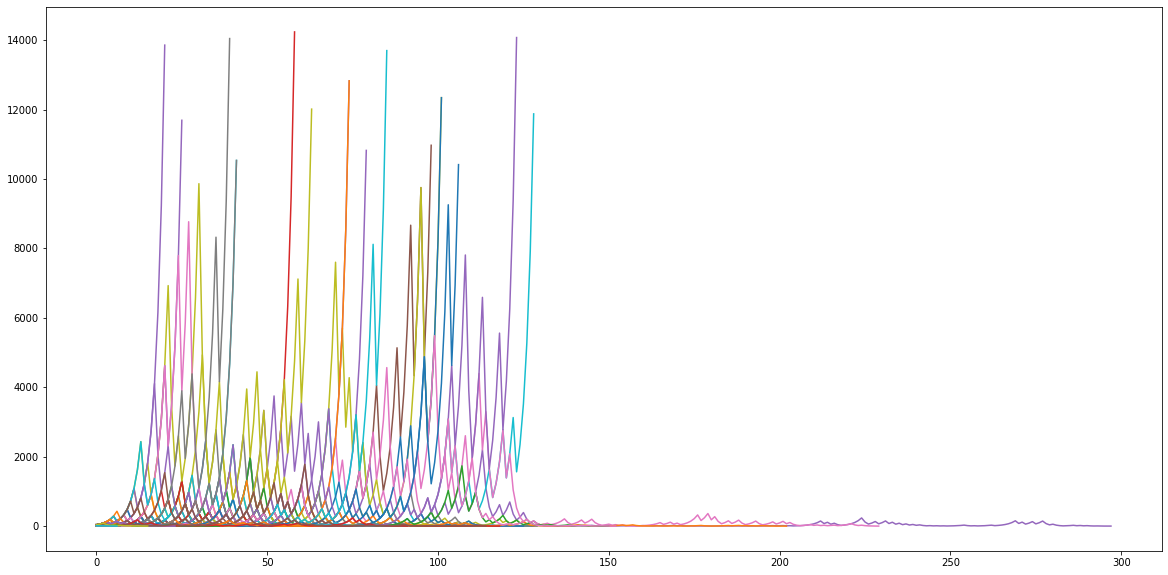

In [234]:
initial_money = 25
bet_chance = 0.6
bet = lambda cash: cash * 0.5
max_rounds = 1_000
max_profit = 10_000

def simulate_gambling():
    all_profits = []
    for i in range(0, 100):
        profits = []
        cash = initial_money
        for i in range(0, max_rounds):
            if cash <= 1:
                # went bust
                break

            if cash >= max_profit:
                break

            bet_value = bet(cash)
            if np.random.rand() < bet_chance:
                cash += bet_value
            else:
                cash -= bet_value

            profits.append(cash)

        all_profits.append(profits)

    plt.figure(figsize=(20, 10))
    for profits in all_profits:
        rounds = list(range(0, min(max_rounds, len(profits))))
        plt.plot(rounds, profits);
        
    bust = [ x for x in all_profits if x[-1] <= 1 ]
    rich = [ x for x in all_profits if x[-1] >= max_profit ]
    print("Went bust:", round(len(bust) / len(all_profits) * 100), "%")
    print("Avg time to go bust:", "%.1f" % np.mean([ len(x) for x in bust ]))
    print("Max profit:", round(len(rich) / len(all_profits) * 100), "%")
    print("Avg time to max profit:", "%.1f" % np.mean([ len(x) for x in rich ]))

simulate_gambling()

# Example 2: stupid expected utility hypothesis

expected_utility_bet for $25: (25, 30.0)
Went bust: 100 %
Avg time to go bust: 2.1
Max profit: 0 %
Avg time to max profit: nan


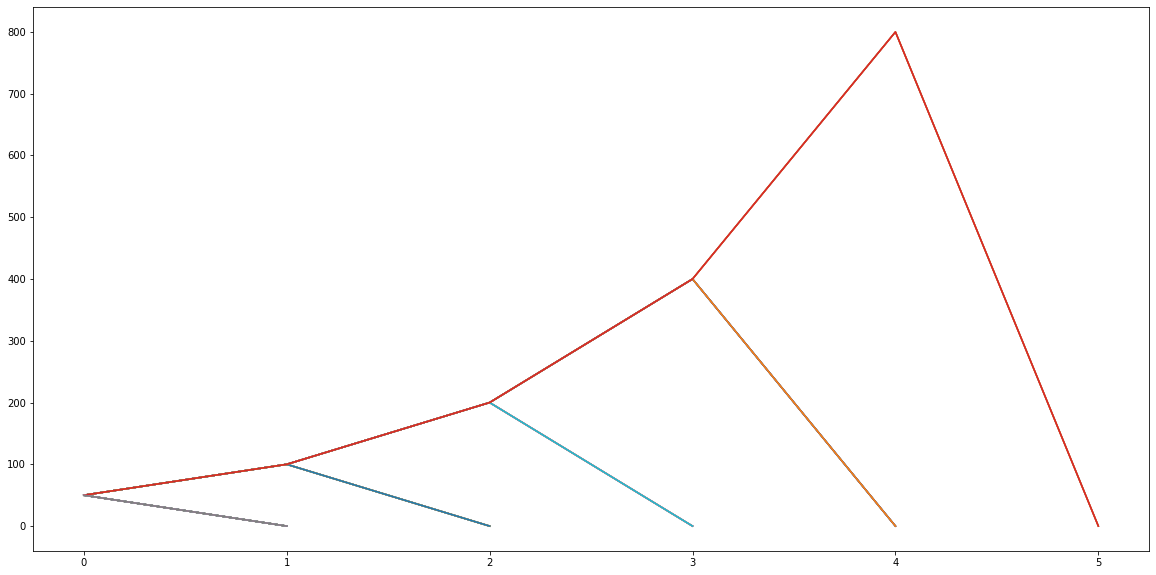

In [235]:
def expected_utility_bet(chance, cash):
    max_utility = (0, 0)
    for i in range(0, cash + 1):
        utility = chance*(cash + i) + (1 - chance)*(cash - i)
        if utility > max_utility[1]:
            max_utility = (i, utility)
    return max_utility

print("expected_utility_bet for $25:", expected_utility_bet(0.6, 25))

bet = lambda cash: expected_utility_bet(bet_chance, cash)[0]
simulate_gambling()

# Example 3: very safe bet

Went bust: 0 %
Avg time to go bust: nan
Max profit: 100 %
Avg time to max profit: 375.4


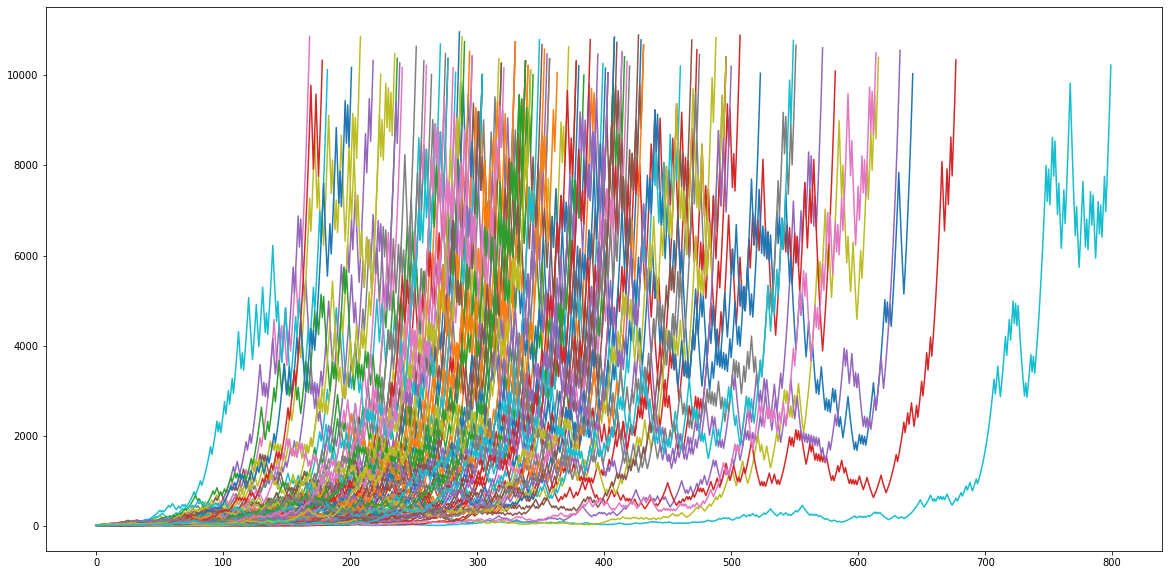

In [214]:
bet = lambda cash: cash * 0.1
simulate_gambling()

# Example 4: kelly criterion

Went bust: 3 %
Avg time to go bust: 192.3
Max profit: 96 %
Avg time to max profit: 282.9


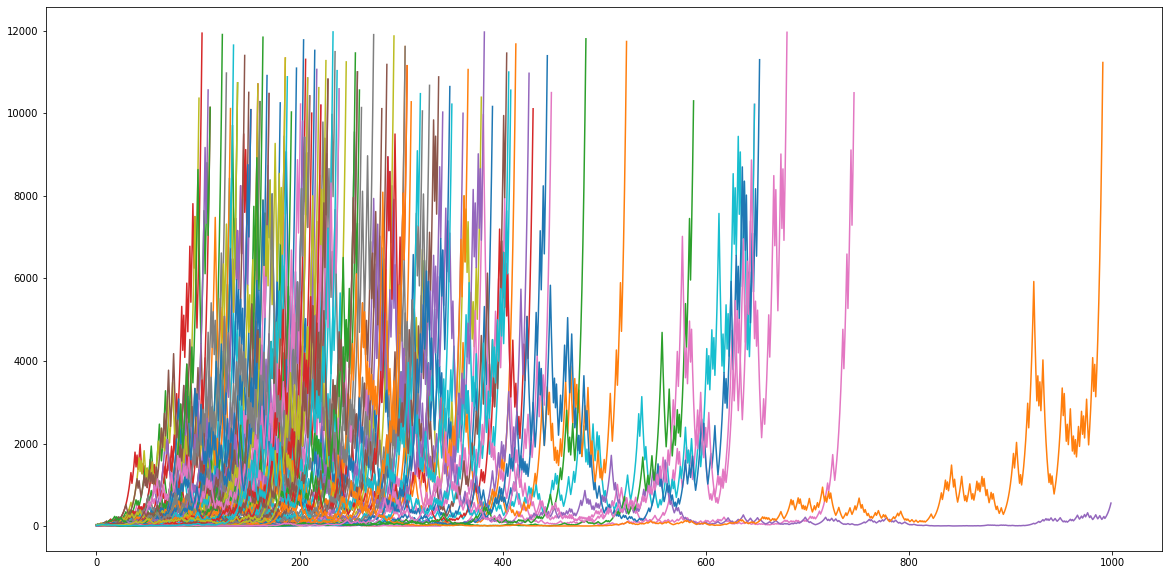

In [222]:
# Kelly Criterion
bet = lambda cash: cash * (bet_chance * 2 - 1)
simulate_gambling()

# Example 5: prospect theory

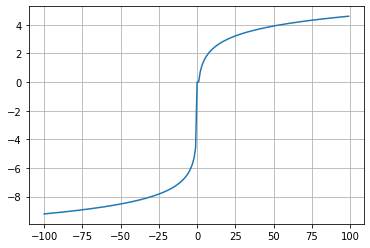

In [223]:
utilities = []
outcomes = list(range(-100, 100))
def prospect_utility(x):
    utility = 0
    if x > 0:
        utility = math.log(x)
    if x < 0:
        utility = -math.log(abs(x) * 100)
    return utility

for x in outcomes:
    utilities.append(prospect_utility(x))
    
plt.grid()
plt.plot(outcomes, utilities);

prospect_theory_bet for $25: (5, 3.23901133841889)
Went bust: 4 %
Avg time to go bust: 70.0
Max profit: 96 %
Avg time to max profit: 299.7


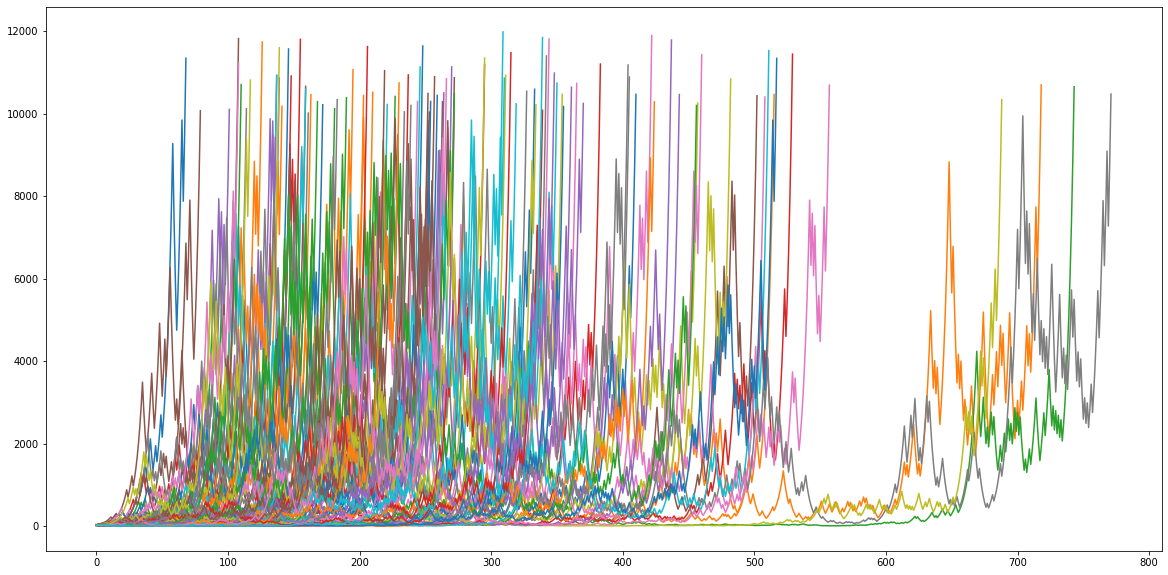

In [224]:
def prospect_theory_bet(chance, cash):
    max_utility = (0, -99999)
    for i in range(1, cash + 1):
        utility = chance * prospect_utility(cash + i) + (1 - chance) * prospect_utility(cash - i)
        if utility > max_utility[1]:
            max_utility = (i, utility)
    return max_utility

print("prospect_theory_bet for $25:", prospect_theory_bet(0.6, 25))
bet = lambda cash: prospect_theory_bet(bet_chance, cash)[0]
simulate_gambling()

# Wait a minute, is prospect theory an actual kelly criterion!?

prospect_theory_bet for $25: (5, 3.23901133841889)
Went bust: 7 %
Avg time to go bust: 129.0
Max profit: 93 %
Avg time to max profit: 284.2


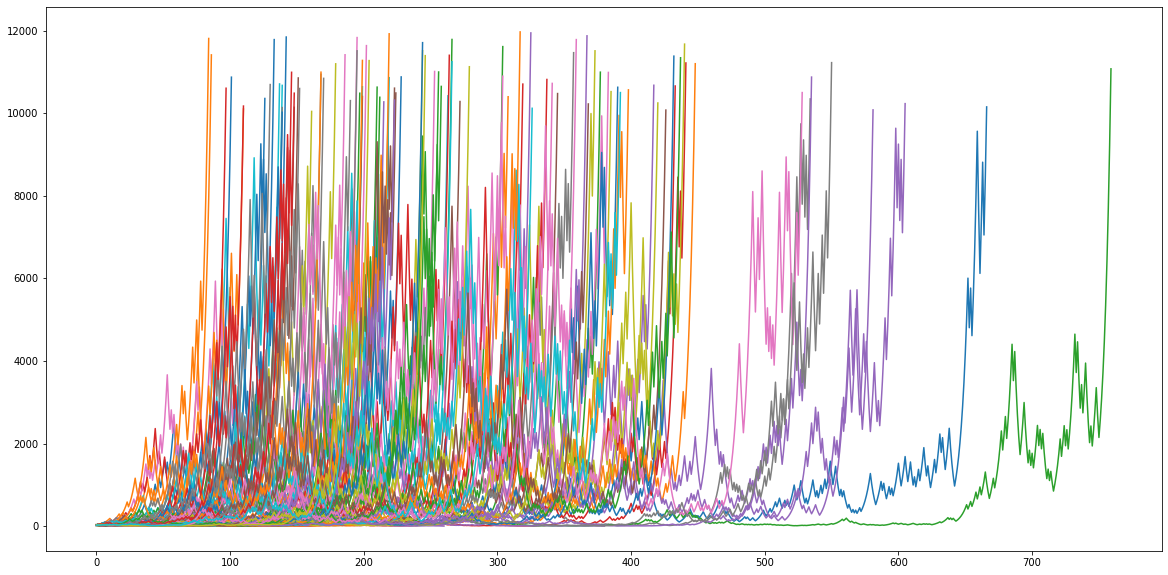

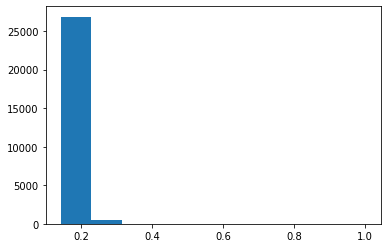

In [202]:
bet_percentages = []
def prospect_theory_bet_acc(chance, cash):
    global bet_percentages
    
    max_utility = prospect_theory_bet(chance, cash)
    bet_percentages.append(max_utility[0] / cash)
    return max_utility

print("prospect_theory_bet for $25:", prospect_theory_bet(0.6, 25))
bet = lambda cash: prospect_theory_bet_acc(bet_chance, cash)[0]
simulate_gambling()
plt.show()
plt.hist(bet_percentages);

# Wow! 0.2, just like kelly criterion for 0.6, what about 0.8?

(kelly criterion should be 0.6 for this one)

prospect_theory_bet for $25: (15, 3.411620581889958)
Went bust: 5 %
Avg time to go bust: 8.2
Max profit: 95 %
Avg time to max profit: 29.9


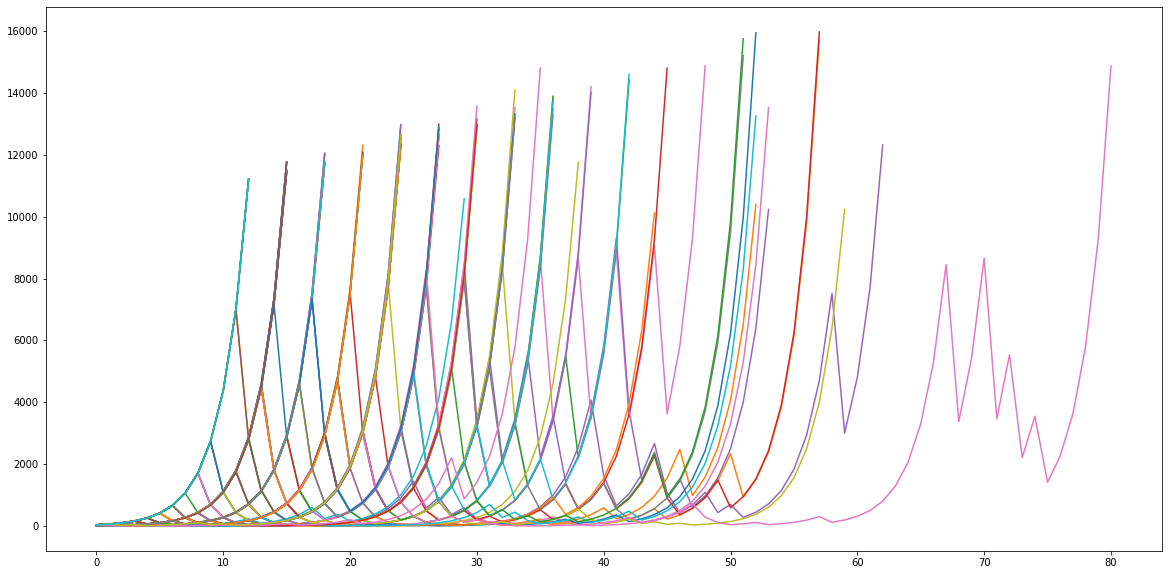

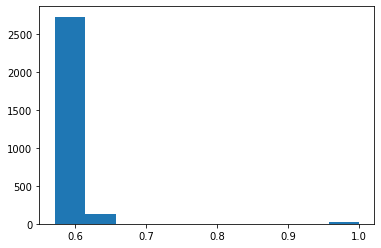

In [204]:
bet_chance = 0.8

bet_percentages = []
def prospect_theory_bet_acc(chance, cash):
    global bet_percentages
    
    max_utility = prospect_theory_bet(chance, cash)
    bet_percentages.append(max_utility[0] / cash)
    return max_utility

print("prospect_theory_bet for $25:", prospect_theory_bet(0.8, 25))
bet = lambda cash: prospect_theory_bet_acc(bet_chance, cash)[0]
simulate_gambling()
plt.show()
plt.hist(bet_percentages);